## 웹 크롤링 실습

- 1) urllib.request 모듈 사용
- 2) Beautiful Soup 사용
- 3) 셀레니움을 이용

### 1) urllib.request 모듈을 이용한 웹스크래핑

### 예제1) 네이버 금융 사이트에서 관심종목 주식 검색

#### 관심 종목 주식 코드 확인 : (예) 삼성전자 - 005930

In [1]:
# 네이버 주식 검색
import urllib.request
import re

url = "https://finance.naver.com/item/main.nhn?code=005930"

html = urllib.request.urlopen(url)
html_contents = str(html.read().decode("ms949"))

# 첫번째 패턴
stock_results = re.findall("(\<dl class=\"blind\"\>)([\s\S]+?)(\<\/dl\>)", html_contents)
#print(stock_results)
samsung_stock = stock_results[0]
samsung_index = samsung_stock[1]
# print(samsung_index)

# 주식정보만 추출
index_list = re.findall("(\<dd\>)([\s\S]+?)(\<\/dd\>)", samsung_index)

for index in index_list :
    print(index[1])


2021년 03월 15일 14시 27분 기준 장중
종목명 삼성전자
종목코드 005930 코스피
현재가 82,100 전일대비 하락 700 마이너스 0.85 퍼센트
전일가 82,800
시가 82,800
고가 82,900
상한가 107,500
저가 82,000
하한가 58,000
거래량 10,281,867
거래대금 845,672백만


### 2) Beautiful Soup을 이용한 웹 스크래핑
- Beautiful Soup : HTML과 XML 파일로부터 데이터를 추출하기 위한 라이브러리
- Beautiful Soup 설치 : pip install bs4

### CSS 선택자 사용하기
- 1) soup.select("선택자") : CSS 선택자로 요소 여러 개를 리스트로 추출
- 2) soup.select_one("선택자") : CSS 선택자로소 요소 하나를 추출

### 예제 1)  네이버 금융에서 원/달러 환율 정보 추출하기 

In [5]:
from bs4 import BeautifulSoup
import urllib.request as req

url = "https://m.stock.naver.com/marketindex/index.nhn"

# urlopen()으로 데이타 가져오기
res = req.urlopen(url)
res = res.read()

# BeautifulSoup으로 분석하기
soup = BeautifulSoup(res, "html.parser")

# 검사 -> copy -> copy selector
#content > div.ct_wrp > div.ct_box.intnl_major_item > ul > li:nth-child(1) > a > div.price_wrp > span
# li 콜론 뒤에 삭제해서 수정하기

# 전체 환율 데이타 추출하기
prices = soup.select("#content > div > div.ct_box.intnl_major_item > ul > li > a > div.price_wrp > span")
# print(prices)

price_lis = []
for price in prices :
    price_lis.append(price.string)

print(price_lis)
    
# # 원/달러 환율 데이타 추출하기
# print("usd/krw =", price_lis[0])

# # 엔/달러 환율 데이타 추출하기
# print("jpy/krw =", price_lis[2])


['1,136.90', '1,357.00', '1,041.07', '174.56', '1,719.50', '65.61']


### 예제 2) 네이버 실시간 영화 랭킹

In [3]:
from bs4 import BeautifulSoup
import requests

# 네이버 영화 랭킹 사이트
url = "https://movie.naver.com/movie/sdb/rank/rmovie.nhn"
response = requests.get(url)
source = response.text

soup = BeautifulSoup(source, "html.parser")

# 네이버 영화 랭킹 
#old_content > table > tbody > tr:nth-child(2) > td.title > div > a
movieList = soup.select("#old_content > table > tbody > tr > td.title > div > a")

for rank, data in enumerate(movieList, start=1):
    print(rank, data.text)

1 미나리
2 극장판 귀멸의 칼날: 무한열차편
3 라야와 마지막 드래곤
4 미션 파서블
5 리스타트
6 소울
7 반지의 제왕: 반지 원정대
8 중경삼림
9 카오스 워킹
10 아이 씨 유
11 톰과 제리
12 암모나이트
13 퍼펙트 케어
14 웨이 다운
15 더 레이서
16 포제서
17 고질라 VS. 콩
18 허트 로커
19 모리타니안
20 쁘떼뜨
21 아홉수 로맨스
22 유어 아이즈 텔
23 아이
24 마리오네트
25 새해전야
26 낙원의 밤
27 인싸
28 파이터
29 금홍아 금홍아
30 아수라도
31 그녀가 사라졌다
32 반지의 제왕: 왕의 귀환
33 스파이의 아내
34 고백
35 라스트 레터
36 태극기 휘날리며
37 승리호
38 반지의 제왕: 두 개의 탑
39 모탈 컴뱃
40 파란 대문
41 정말 먼 곳
42 러빙 빈센트
43 더블패티
44 해피 투게더
45 그린 북
46 아무도 없는 곳
47 자산어보
48 몬스터 헌터
49 세자매
50 인천스텔라


### 3) 셀레니움을 이용한 웹 스크래핑
- 셀레니움(selenium)
   - 웹 애플리케이션을 위한 테스팅 프레임워크, 자동화 테스트를 위해 여러 가지 기능을 지원 
   - webdriver의 API를 통해 브라우저를 제어하기 때문에 자바스크립트에 의해 동적으로 생성되는 사이트의 데이터를 크롤링할 때 매우 유용하게 사용되는 스크래핑 도구
- 크롬 드라이브 다운로드 : 버전 83.0.4103.61(공식 빌드) (64비트)
   - https://chromedriver.chromium.org/ https://sites.google.com/a/chromium.org/chromedriver/downloads
- pip install selenium

### 예제 1) 구글 검색

In [6]:
from selenium import webdriver
import time

# 드라이브 지정
path = "./chromedriver"
driver = webdriver.Chrome(path)

# 구글 사이트 검색
driver.get("http://www.google.com")
time.sleep(5)

search_box = driver.find_element_by_name('q')
search_box.send_keys("파이썬")
search_box.submit()
time.sleep(10)

driver.close()

## 안티 크롤링 회피 방법
- requests 모듈의 requests.get() 함수 안에 headers={‘User-Agent’:’Mozilla 5.0…’}이라는 
- 웹브라우저에 대한 정보를 헤더 값을 추가한 headers 를 이용하여 서버에 데이터를 요청하면 
- 마치 웹브라우저를 통해 데이터를 요청하는 것으로 보이게 하여 간단히 안티 크롤링을 회피할 수 있다.

CJ69/hjGDOMpo7qDqTLk0aVdgmcrmxg6g7nvhjsjb+srgMtHhB7xCXqVb0s0DR5hJw6ltBduo8ktQO3cdHrXTYi0wM/WvC1khL9sZrnj8eZa2IiYiYVhbwJJaERSmbS6Dppbkmqb5HCFy/v7UbMqyE4Rb7InVZEo0izCbp1m7dN31xLb5wwrbbCQpaFOE/Q1gg/Iyhg+wdNxFdpZxhFi9olynHUjwmPLDkVVURtleieWRsYx15WVcO+BigeXRbVdz9eKWgQWbr6Y/m+fRqTGfNPeX2huHVEXbWbSg7YBurTIsffX2hcO/uLgWXbDgUuhtpHPgfdtSfec9PTTdTKV/60ij1TiVO9AUrqQ/FlZYpl5pRLrLts8bFPS83khx+0e7B9o90O6Bdg+0e6DdA/9XHvgvMc/4R1gfN40AAAAASUVORK5CYII=" width="30"/></div> <div class="dsc_area"> <strong class="elss tit">코로나19</strong> <p class="elss dsc">확진현황 및 백신·접종 정보</p> </div> </a> <a class="spnew_bf item" href="?where=nexearch&amp;query=%EC%BD%94%EB%A1%9C%EB%82%9819+%EC%84%A0%EB%B3%84%EC%A7%84%EB%A3%8C%EC%86%8C&amp;sm=tab_etc" onclick="return goOtherCR(this, 'a=bnr.link&amp;r=2&amp;i=&amp;u='+urlencode(this.href));"> <div class="ico_area"></div> <div class="dsc_area"> <strong class="elss tit">선별 진료소</strong> <p class="elss dsc">내주변 진료소 찾기</p> </div> </a> <a class="spnew_bf item" href="https://news.na
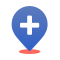
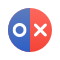
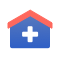

In [9]:
import requests
from bs4 import BeautifulSoup

# headers 정보 : F12버튼 - Network - Header - 'User-Agent'와 '값'을 딕셔너리 형태로 가져오기
# headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.116 Safari/537.36'}
headers = {'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 11_2_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}

# requests.get() 의 옵션으로 headers 정보 추가
res = requests.get('https://search.naver.com/search.naver?sm=top_hty&fbm=1&ie=utf8&query=코로나',
                  headers=headers)

html = BeautifulSoup(res.text, 'html.parser')
print(html)